In [266]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

## Euler and Logistic

In [245]:
def euler(df, y0, h, t0=0, max_iter=100, tol=1e-5, verbose=False):
    y, t = y0, t0 
    Y = np.zeros(max_iter)
    T = np.zeros(max_iter)
    for i in range(len(Y)):
        T[i] = t
        Y[i] = y
        y = y + h*df(t, y)
        t = t + h
    return T, Y

In [246]:
def logistic_generator(r, K):
    def dfdx(t, P):
        return r*P*(1-P/K)
    return dfdx

In [286]:
r, K = 1.2, 1000
logistic = logistic_generator(r, K)

In [287]:
y0, h, max_iter = 1, 0.1, 200
t, y = euler(df=logistic, y0=y0, h=h, max_iter=max_iter, verbose=True)

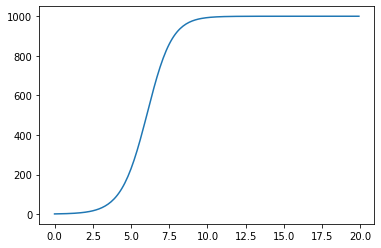

In [288]:
plt.plot(t, y)

## Heun's

In [250]:
def Heun(df, y0, h, t0=0, max_iter=100, tol=1e-5, verbose=False):
    y, t = y0, t0 
    Y = np.zeros(max_iter)
    T = np.zeros(max_iter)
    for i in range(len(Y)):
        T[i] = t
        Y[i] = y
        k1 = df(t, y)
        k2 = df(t+h, y+h*df(t, y))
        y = y + h*(k1+k2)/2        
        t = t + h
    return T, Y

In [251]:
t, y = Heun(df=logistic, y0=y0, h=h, max_iter=max_iter)

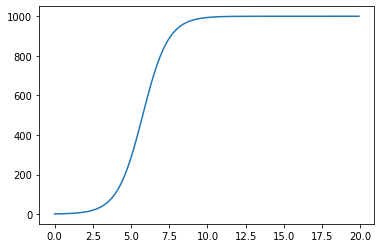

In [252]:
plt.plot(t, y)

## SIR Heun

In [253]:
def SIR_gen(f, B, r):
    dSdt = lambda t, y: -f*y[0]*y[1] + B
    dIdt = lambda t, y: f*y[0]*y[1] - r*y[1]
    dRdt = lambda t, y: r*y[1]
    
    dSIRdt = lambda t, y: np.array([dSdt(t, y), dIdt(t, y), dRdt(t, y)])
    
    return dSIRdt

In [254]:
def Heun_many(df, y0, h, t0=0, t_max = 100, tol=1e-5, verbose=False):
    y, t = y0, t0 
    Y = np.array([y])
    T = [t]
    while t < t_max:
        if verbose: print('t={0}, y={1}'.format(t, y))
        k1 = df(t, y)
        k2 = df(t+h, y+h*df(t, y))
        y = y + h*(k1+k2)/2        
        t = t + h
        T.append(t)
        Y = np.vstack([Y, y])
    return T, Y

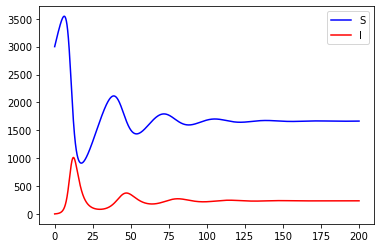

In [255]:
h = 0.01
f, B, r = 0.0003, 120, 0.5
SIR = SIR_gen(f, B, r)
SIR_0 = np.array([3000, 5, 0])
t, sir = Heun_many(df=SIR, y0=SIR_0, h=h, t0=0, t_max=200, tol=1e-5, verbose=False)
plt.plot(t, sir[:, 0], c='b', label='S')
plt.plot(t, sir[:, 1], c='r', label='I')
plt.legend()
# plt.plot(t, sir[:, 2], c='g', label='R')

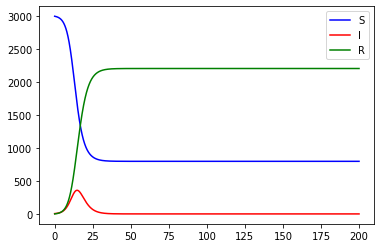

In [256]:
h = 0.01
f, B, r = 0.0003, 0, 0.5
SIR = SIR_gen(f, B, r)
SIR_0 = np.array([3000, 5, 0])
t, sir = Heun_many(df=SIR, y0=SIR_0, h=h, t0=0, t_max=200, tol=1e-5, verbose=False)
plt.plot(t, sir[:, 0], c='b', label='S')
plt.plot(t, sir[:, 1], c='r', label='I')
plt.plot(t, sir[:, 2], c='g', label='R')
plt.legend()

## RK2

In [257]:
def RK2(df, y0, h, t0=0, a=1/2, t_max = 100, tol=1e-5, verbose=False):
    b = 1-a
    alpha = 1/(2*b)
    beta = alpha
    y, t = y0, t0 
    Y = np.array([y])
    T = [t]
    while t < t_max:
        if verbose: print('t={0}, y={1}'.format(t, y))
        k1 = df(t, y)
        k2 = df(t+alpha*h, y+beta*h*k1)
        y = y + h*(a*k1+b*k2)        
        t = t + h
        T.append(t)
        Y = np.vstack([Y, y])
    return T, Y

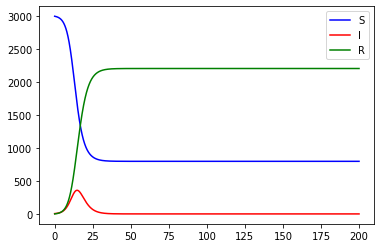

In [258]:
h = 0.01
f, B, r = 0.0003, 0, 0.5
SIR = SIR_gen(f, B, r)
SIR_0 = np.array([3000, 5, 0])
a = 0.5
t, sir = RK2(df=SIR, y0=SIR_0, h=h, t0=0, a=a, t_max=200, tol=1e-5, verbose=False)
plt.plot(t, sir[:, 0], c='b', label='S')
plt.plot(t, sir[:, 1], c='r', label='I')
plt.plot(t, sir[:, 2], c='g', label='R')
plt.legend()

## Euler Heun Compare

In [259]:
def exp_gen(r):
    dydx = lambda x, y: r*y
    return dydx

In [275]:
r=2
y0=1
h=0.1
x0=0
dydx = exp_gen(r)
x_e, y_e = euler(dydx, y0, h, x0)
x_h, y_h = Heun(dydx, y0, h, x0)
bunch = solve_ivp(fun=dydx, t_span=(0, 10), y0=np.array([y0]))
x = bunch['t']
y = bunch['y'].ravel()

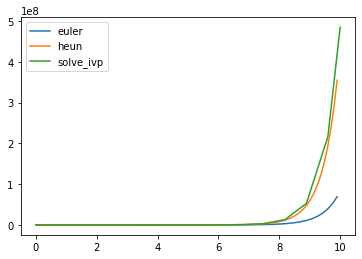

In [276]:
plt.plot(x_e, y_e, label='euler')
plt.plot(x_h, y_h, label='heun')
plt.plot(x, y, label='solve_ivp')
plt.legend()